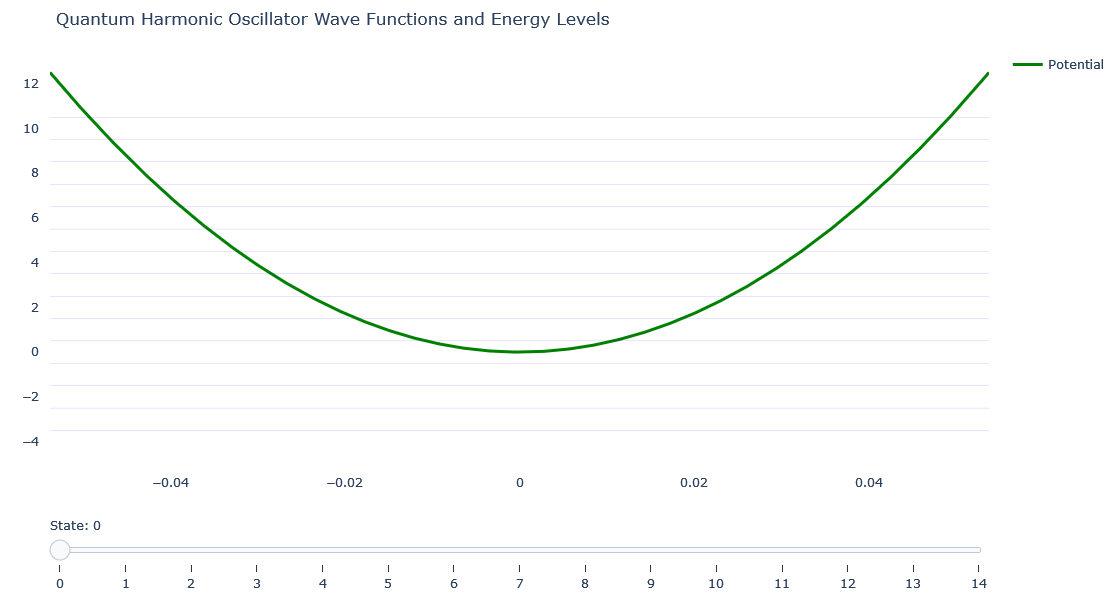

In [68]:
import numpy as np
import plotly.graph_objs as go
from scipy.special import hermite
from scipy.constants import hbar, m_e

# Constants for the harmonic oscillator
omega = 1.0  # Angular frequency
mass = m_e  # Mass of the particle (electron mass for example)
a = np.sqrt(hbar / (mass * omega))

# Function to calculate the wave function for the nth state
def harmonic_oscillator_wave_function(n, x):
    Hn = hermite(n)
    normalization = 1.0 / np.sqrt(2**n * np.math.factorial(n) * np.sqrt(np.pi) * a)
    return normalization * Hn(x / a) * np.exp(-x**2 / (2 * a**2))

# Function to find the x-limits for a given energy level
def find_x_limits(energy, x_values, potential):
    potential_diff = np.abs(potential - energy)
    min_diff_index = np.argmin(potential_diff)
    x_limit = x_values[min_diff_index]
    return -abs(x_limit) * 0.9, abs(x_limit) * 0.9

# Create x values
x_values = np.linspace(-5 * a, 5 * a, 1000)

# Calculate the potential
potential = 0.5 * mass * omega**2 * x_values**2 / hbar

# Create the initial figure
fig = go.Figure()

# Add the potential parabola
fig.add_trace(
    go.Scatter(x=x_values, y=potential, mode='lines', line=dict(color='green', width=3), name='Potential')
)

# Add blue lines at energy levels
energy_levels = [(n + 0.5) for n in range(15)]
for i, energy in enumerate(energy_levels):
    fig.add_trace(
        go.Scatter(
            x=[-5 * a, 5 * a],
            y=[energy - 4, energy - 4],  # Ensure all energy levels are displayed
            mode='lines',
            line=dict(color='blue', width=0.2),
            opacity=0.5,
            showlegend=False
        )
    )

# Create animation frames for wave functions and energy levels
frames = []
for i, energy in enumerate(energy_levels):
    wave_function = harmonic_oscillator_wave_function(i, x_values)
    if i == 0:
        ball_x_positions = []  # No balls for ground state
        ball_y_positions = []
    elif i == 1:
        ball_x_positions = [0]  # Center for first excited state
        ball_y_positions = [energy_levels[i]]
    else:
        x_min, x_max = find_x_limits(energy, x_values, potential)
        ball_x_positions = np.linspace(x_min, x_max, i)  # Distribute within parabola limits
        ball_y_positions = [energy_levels[i]] * i
    frames.append(go.Frame(
        data=[
            go.Scatter(x=x_values, y=wave_function, mode='lines', line=dict(color='darkblue', width=2), showlegend=False),
            go.Scatter(x=x_values, y=wave_function, mode='lines', fill='tozeroy', fillcolor='rgba(0,0,255,0.2)', line=dict(color='darkblue', width=2), showlegend=False),
            go.Scatter(x=[-5 * a, 5 * a], y=[energy_levels[i], energy_levels[i]], mode='lines', line=dict(color='red', width=3), showlegend=False),
            go.Scatter(x=x_values, y=potential, mode='lines', line=dict(color='green', width=3), showlegend=False),
            go.Scatter(x=ball_x_positions, y=ball_y_positions, mode='markers', marker=dict(color='gold', size=10, line=dict(color='orange', width=2)), showlegend=False)
        ],
        name=f'frame_{i}'
    ))

fig.frames = frames

# Update layout with slider
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {'prefix': 'State: '},
        'pad': {"t": 50},
        'steps': [
            {'label': str(i), 'method': 'animate', 'args': [[f'frame_{i}'], {'mode': 'immediate', 'frame': {'duration': 0, 'redraw': True},
                                                                             'transition': {'duration': 0}}]}
            for i in range(15)
        ]
    }],
    yaxis=dict(range=[-5, max(energy_levels) - 1], showgrid=False, zeroline=False),
    xaxis=dict(range=[-5 * a, 5 * a], showgrid=False, zeroline=False),
    plot_bgcolor='white',
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=10),
    title="Quantum Harmonic Oscillator Wave Functions and Energy Levels"
)

# Show the plot
fig.show()
